In [16]:
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams['figure.facecolor'] = 'white'

In [17]:
df1=pd.read_pickle("./rundf/df_run_CTRL_rr.pkl")
df1=df1[1:]

runs=['03','04','05','06','07','08','09','10','11','12','13']
fnames=['rundf/df_run_land_t' + r + '_rr.pkl' for r in runs]
nt=13
df1s=[pd.read_pickle(f).head(nt) for f in fnames]

dryruns=['03','04','05','06','07','08','09','10','11','12','13']
fnames=['rundf/df_run_land_dry_t' + r +'.pkl' for r in dryruns]
df1drys=[pd.read_pickle(f).head(nt) for f in fnames]

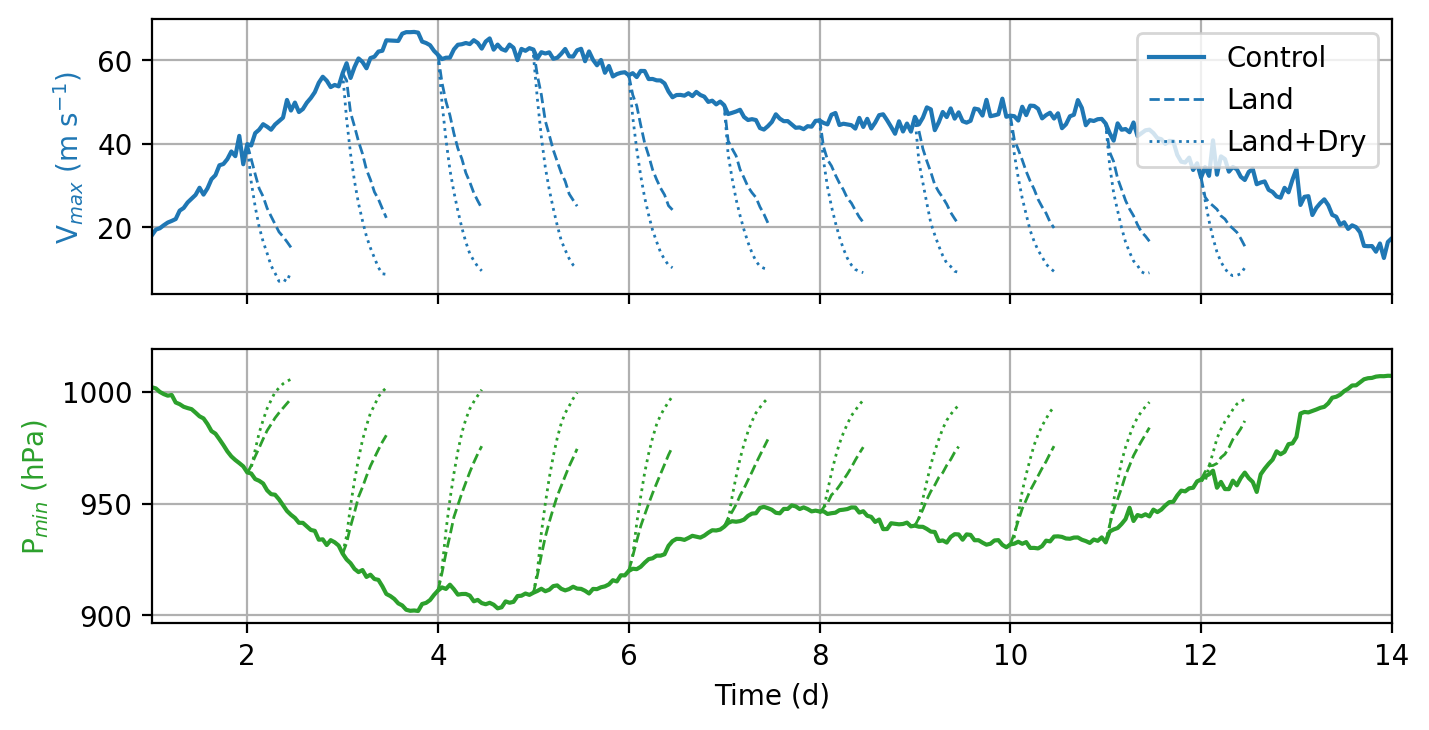

In [27]:
fig,axs=plt.subplots(2, 1, sharex='col',dpi=200)

linw=1.5
hc=axs[0].plot(df1.t,df1.V10max,color='C0',lw=linw,linestyle='-')
# axs[1].plot(df1.t,df1.rV10max,color='C1',lw=linw,linestyle='-')
axs[1].plot(df1.t,df1.pmin,color='C2',lw=linw,linestyle='-')


axs[0].set_ylabel('V$_{max}$ (m s$^{-1}$)',color='C0')
# axs[1].set_ylabel('R$_{max}$ (km)',color='C1')
axs[1].set_ylabel('P$_{min}$ (hPa)',color='C2')
 
linw=1
for n,df in enumerate(df1s):
    hl=axs[0].plot(df.t,df.V10max,color='C0',lw=linw,linestyle='--')
#     axs[1].plot(df.t,df.rV10max,color='C1',lw=linw,linestyle='--')
    axs[1].plot(df.t,df.pmin,color='C2',lw=linw,linestyle='--')
    
linw=1
for n,df in enumerate(df1drys):
    hd=axs[0].plot(df.t,df.V10max,color='C0',lw=linw,linestyle=':')
#     axs[1].plot(df.t,df.rV10max,color='C1',lw=linw,linestyle=':')
    axs[1].plot(df.t,df.pmin,color='C2',lw=linw,linestyle=':')
    
axs[1].grid(True)
axs[1].set_xlabel('Time (d)')
axs[1].set_position
axs[1].grid(True)

xmin=1
xmax=14
axs[0].set_xlim(xmin,xmax)
# plt.xticks(range(1,xmax))
axs[0].grid(True)

# axs[1].set_ylim((0, 80))
fig.set_size_inches(8,4)
axs[0].legend((hc[0],hl[0],hd[0]),('Control','Land','Land+Dry'))
# fig.savefig('vmax_ts_.png',dpi=300,bbox_inches='tight', pad_inches=0.1,transparent=False)
plt.show()